<font size="6">MEC301 - Métodos Numéricos</font>
# Repaso Parte 2 -  Métodos numéricos basados en series de Taylor
Profesor: Francisco Ramírez Cuevas<br>

<h1>Contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Búsqueda-de-raíces" data-toc-modified-id="Búsqueda-de-raíces-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Búsqueda de raíces</a></span></li><li><span><a href="#Integración-numérica" data-toc-modified-id="Integración-numérica-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Integración numérica</a></span><ul class="toc-item"><li><span><a href="#Caso-1.-Usando-scipy.integrate.trapz" data-toc-modified-id="Caso-1.-Usando-scipy.integrate.trapz-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Caso 1. Usando <code>scipy.integrate.trapz</code></a></span></li><li><span><a href="#Caso-2.-Usando-scipy.integrate.quad" data-toc-modified-id="Caso-2.-Usando-scipy.integrate.quad-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Caso 2. Usando <code>scipy.integrate.quad</code></a></span></li></ul></li></ul></div>

## Búsqueda de raíces

Consideremos el siguiente problema. Queremos resolver el siguiente sistema de ecuaciones

\begin{align*}
3 &= \sqrt{1+x^2} + \sqrt{2+y} \\
a &= x+y
\end{align*}

donde $a$ es un parámetro constante.

Usaremos ```scipy.optimize.fsolve``` para resolver este sistema dado un valor $a = 1$.

Primero, notemos que resolver el sistema es equivalente a encontrar las raices de la función vectorial:

\begin{equation*}
F(x,y) = \begin{cases}
\sqrt{1+x^2} + \sqrt{2+y} - 3 \\
x+y - a
\end{cases}
\end{equation*}

En el código llamaremos a esta función `find_xy`.

In [1]:
import numpy as np
from scipy.optimize import fsolve

def find_xy(x,a):
    f = np.zeros(2)
    f[0] = np.sqrt(1+x[0]**2) + np.sqrt(2+x[1]) - 3
    f[1] = x[0]+ x[1] - a
    return f
a = 1.5
roots = fsolve(lambda x: find_xy(x,a) ,[1,1])
print('La solución es x = %.3f, y = %.3f: ' % tuple(roots))

La solución es x = 1.012, y = 0.488: 


/home/fvr/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Podemos generar una función `F_root(a)` que, dado un valor $a$, determine $x$ e $y$ a partir del sistema de ecuaciones en ```find_xy```

In [2]:
def F_root(a):
    return fsolve(lambda x: find_xy(x,a) ,[1,1])

a = np.linspace(1,2,11)
for ai in a:
    roots = F_root(ai)
    print('Para a = %.1f, la solución es x = %.3f, y = %.3f: ' % (ai, roots[0], roots[1]))
    

Para a = 1.0, la solución es x = 1.435, y = -0.435: 
Para a = 1.1, la solución es x = 1.343, y = -0.243: 
Para a = 1.2, la solución es x = 1.257, y = -0.057: 
Para a = 1.3, la solución es x = 1.173, y = 0.127: 
Para a = 1.4, la solución es x = 1.092, y = 0.308: 
Para a = 1.5, la solución es x = 1.012, y = 0.488: 
Para a = 1.6, la solución es x = 0.931, y = 0.669: 
Para a = 1.7, la solución es x = 0.848, y = 0.852: 
Para a = 1.8, la solución es x = 0.761, y = 1.039: 
Para a = 1.9, la solución es x = 0.667, y = 1.233: 
Para a = 2.0, la solución es x = 0.556, y = 1.444: 


En este problema estamos interesados en la evolución de $y$ con respecto a $a$. Analicemos el gráfico $a$ vs $y$

In [3]:
%%capture showplot1
import matplotlib.pyplot as plt
a = np.linspace(1,2,100)

# generamos un arreglo "y" vacío de tamaño a.shape
y = np.zeros(a.shape)
for i in range(len(a)): 
    y[i] = F_root(a[i])[1]   # necesito valor y

# graficamos el resultado
plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente    
    
plt.plot(a,y,'b')
plt.xlabel('parámetro $a$')
plt.ylabel('valor de $y$')
plt.show()

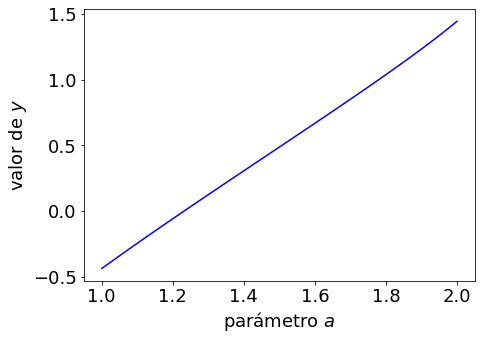

In [4]:
showplot1()

Supongamos ahora que queremos encontrar el cruce de la curva $y(a)$ con respecto a otra curva $z(a)$. En el caso de la curva $z(a)$, solo contamos con datos tabulados

In [5]:
# datos tabulados de la curva "ai"
ai = np.array([ 0.93659254,  1.21600475,  1.47406066,  1.6181766 ,  1.79508299,  1.96052857])
zi = np.array([10.04879138,  9.52771476,  7.76181831,  5.76146062,  1.74436301, -4.19067304])

Grafiquemos $z(a)$ junto a $y(a)$ para poder estimar el punto donde se cruzan

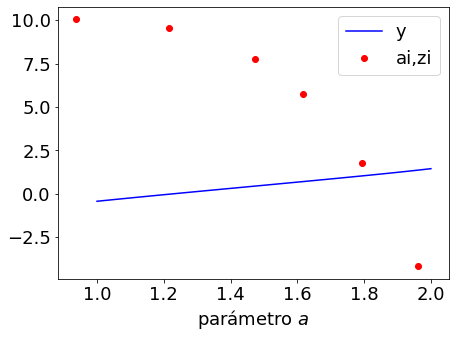

In [6]:
plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente    
    
plt.plot(a,y,'b',label='y')
plt.plot(ai,zi,'or',label='ai,zi')
plt.xlabel('parámetro $a$')
plt.legend()
plt.show()

Notamos que el cruce entre ambas curvas se encuentra en el intervalo $a\in[1.8,2.0]$

Para poder determinar el punto donde ambas curvas se cruzan, primero debemos generar una función tipo *callable* de los datos tabulados `ai` y `zi`. Usamos `CubicSpline` para generar esta función:

In [7]:
from scipy.interpolate import CubicSpline
z = CubicSpline(ai,zi) # una función z(a)


Ahora, usamos `scipy.optimize.root_scalar` en el intervalo $a\in[1.8,2.0]$ para determinar el punto de cruce de ambas curvas. Notar que esto es equivalente a encontrar la raíz de una función $g(a) = z(a) - y(a)$. Notar también que la función $y(a)$ no está en la variable `y` sino que en la función `F_root(a)[1]`

In [25]:
from scipy.optimize import root_scalar
g = lambda a: z(a) - F_root(a)[1] # g(a) = z(a) - y(a)
sol = root_scalar(g,bracket=[1.8,2.0])
print(type(sol))


<class 'scipy.optimize.zeros.RootResults'>


In [9]:
# extraemos la raíz de la solución
a_sol = sol.root
print('El cruce de la curva y con z(a) es:', a_sol)

El cruce de la curva y con z(a) es: 1.8176918393722712


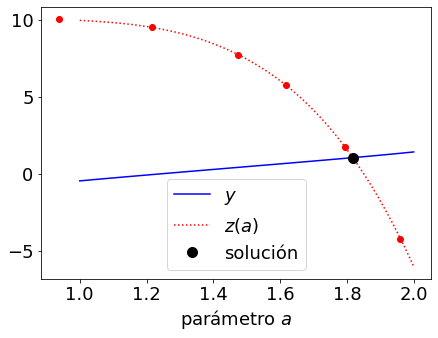

In [23]:
plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente    
    
plt.plot(a,y,'-b',label='$y$')
plt.plot(ai,zi,'or')
plt.plot(a,z(a),':r', label='$z(a)$')
plt.plot(a_sol,z(a_sol),'ok',markersize=10.0,label='solución')
plt.xlabel('parámetro $a$')
plt.legend()
plt.show()

## Integración numérica

Supongamos que queremos calcular la integral:
\begin{equation*}
\int_0^\infty e^{-3/x^4} f(x) dx
\end{equation*}

donde $f(x)$ es una función tabulada, tal que: 
\begin{equation*}
\lim_{x\rightarrow \pm\infty} f(x) = 0
\end{equation*}

In [29]:
xi = np.array([0.20277963, 0.26630972, 0.34247914, 0.39667691, 0.46547919,
               0.52478203, 0.59343878, 0.65994828, 0.73700775, 0.80918162])
fi = np.array([1.83447556e-05, 1.18014606e-03, 4.67326857e-02, 2.67674707e-01, 8.63188848e-01, 
               9.26982234e-01, 3.40317177e-01, 4.24915073e-02, 9.73222303e-04, 7.49226848e-06])

Text(0, 0.5, 'fi')

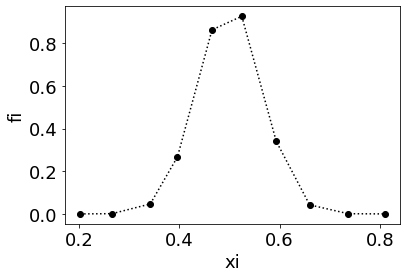

In [30]:
plt.plot(xi,fi,'o:k')
plt.xlabel('xi')
plt.ylabel('fi')

Para calcular esta integral tenemos dos altenativas.
1. Generar un arreglo `yi` evaluando $e^{-3/x^4}$ en los datos tabulados `xi`, y luego integrar `yi*fi` usando `scipy.integrate.trapz`
2. Generar una función `f(x)` a partir de los datos tabulados `xi` e `fi` y luego integrar $e^{-3/x^4}f(x)$ usando `scipy.integrate.quad`

### Caso 1. Usando `scipy.integrate.trapz`

In [31]:
from scipy.integrate import trapz
yi = np.exp(-3/xi**4)
int_trapz = trapz(yi*fi,xi)
print('Íntegral por regla del trapecio: ', int_trapz)

Íntegral por regla del trapecio:  3.4479273749977642e-09


Evidentemente, aunque el método es sencillo, la precisión de este método está condicionada por los valores tabulados `xi`. Así, no tenemos control del error

### Caso 2. Usando `scipy.integrate.quad`
Para esto, primero debemos generar una función (*callable*) a partir de los datos `xi` y `fi`. Usaremos `CubicSpline` para esto. 

Debido a que la función tiende a 0 en los extremos, usaremos una condición `bc_type='clamped'`, es decir: $f'(x_0) = f'(x_n) = 0$. Además, dado que la integral comprende el intervalo $x\in[0,\infty)$, habilitaremos la extrapolación en `CubicSpline`.

In [32]:
f = CubicSpline(xi,fi,bc_type='clamped',extrapolate=True)

Grafiquemos nuestra función en el intervalo $x\in[0,1.5]$ para asegurarnos que se comporte de acuerdo a lo esperado.

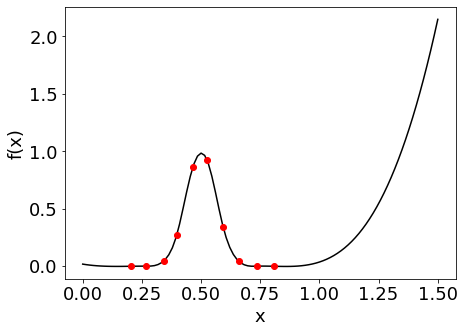

In [15]:
x = np.linspace(0,1.5,100)

plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente    
plt.plot(x,f(x),'-k')
plt.plot(xi,fi,'or')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

Vemos que nuestra función tiene un comportamiento no adecuado para valores extrapolados.


Para este caso en particular, lo recomendable es condicionar los valores extrapolados a un valor conocido. Sabemos que $f(x) \rightarrow 0$ para valores extremos. Así, queremos que nuestra función sea cero fuera de un intervalo acotado de $x$.

Si observamos los datos tabulados, notamos que en los extremos `fi[0]` y `fi[-1]` < `1E-4`. Por otro lado, de la gráfica anterior, notamos que $\max[f(x)]= 1$. Así, tomaremos los extremos `x[0] = 0.80918162` y `x[-1] = 0.2027796` como límites para acortar nuestra función.

Dicho de otra forma, queremos que:

si $x>\mathrm{x[0]}$ o $x<\mathrm{x[-1]}$ $\Rightarrow f(x) = 0$

Para esto utilizamos los condicionales `>, <, ==`.

Por ejemplo, la condición `(xi[0]< x)` entrega `True` si `x` es mayor que `x[0]` y `False` de otra forma. Esto se interpreta como 0 o 1 al multiplicar por otro parámetro.

In [16]:
x_test = np.array([-1,0,0.1,0.2,0.3])
print('x_test = ', x_test)
print('x_test > x[0] = ', x[0] < x_test)
print('(x[0] < x_test)*x_test =', (x[0] < x_test)*x_test)

x_test =  [-1.   0.   0.1  0.2  0.3]
x_test > x[0] =  [False False  True  True  True]
(x[0] < x_test)*x_test = [-0.   0.   0.1  0.2  0.3]


Así, ejecutar `(xi[0]< x)*(x < xi[-1])*f(x)` es equivalente a:

\begin{equation*}
f(x) = \begin{cases}
\mathrm{CubicSpline(xi,fi)} & \mathrm{si}~\mathrm{x[0]} <x <\mathrm{x[-1]}\\
0 & \mathrm{otros~casos}
\end{cases}
\end{equation*}

Utilicemos esto para generar una versión mejorada de la función $f(x)$. Llamaremos a esta función `f_fixed`

In [17]:
# limitamos CubicSpline al intervalo  x[0] < x < x[-1]
# fuera de este intervalo, la función es 0
f_fixed = lambda x: f(x)*(xi[0]< x)*(x < xi[-1])

Graficamos nuestra función para comprobar nuestro resultado:

In [18]:
%%capture showplot2
x = np.linspace(0,1.5,100)
plt.figure(figsize = (7, 5))           # Tamaño de figura
plt.rcParams.update({'font.size': 18}) # Tamaño de fuente    

plt.plot(x,f(x),':k',label='f(x) de CubicSpline')
plt.plot(x,f_fixed(x),'-b',label='f(x) modificada')
plt.plot(xi,fi,'or')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

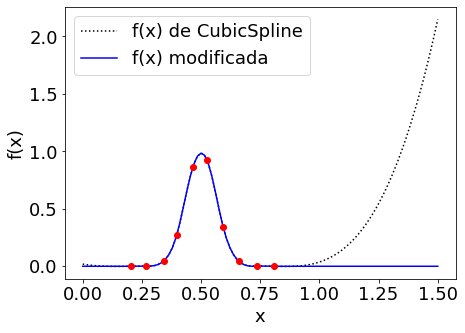

In [19]:
showplot2()

Ya con nuestra función $f(x)$ podemos proceder a integrar con `quad`.

In [20]:
from scipy.integrate import quad

# generamos una función para el integrando e^(-3/x^4)*f(x)
f_integrate = lambda x: np.exp(-3/x**4)*f_fixed(x)

int_out = quad(f_integrate,0,np.inf)
print('el valor de la integral es:', int_out[0])
print('El error absoluto es:', int_out[1])

el valor de la integral es: 4.796062364850844e-09
El error absoluto es: 7.695272368377512e-09



Notamos que el valor de la integral es del mismo orden que el error absoluto. En otras palabras, el error relativo $\frac{|x_\mathrm{exact} - x|}{|x_\mathrm{exact}|}$ es alto:

In [21]:
print('Error relativo: %.3f %%' % (int_out[1]/int_out[0]*100))

Error relativo: 160.450 %


Esto sucede debido a que, por defecto, el error absoluto de `quad` es `epsabs=1.49e-08` que es mayor al valor de la integral.

Para ajustar esto debemos condicionar el error absoluto con la instrucción `epsabs`. Consideramos un error absoluto de $1\times10^{-20}$

In [22]:
int_out = quad(f_integrate,0,np.inf, epsabs=1E-20)
print('el valor de la integral es:', int_out[0])
print('El error absoluto es:', int_out[1])
print('Error relativo: %.3e %%' % (int_out[1]/int_out[0]*100))

el valor de la integral es: 1.817223426069607e-08
El error absoluto es: 9.02521096123962e-17
Error relativo: 4.966e-07 %
